# Purchase Expense Trend Analysis
Data Science / ML Intern Assignment


In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

## 1. Data Generation
Synthetic dataset created with 500 purchase invoice records including vendor, category, GST and invoice details.


In [3]:
num_records = 500

dates = pd.date_range(start="2024-01-01", end="2024-12-31")
vendors = [f"Vendor_{i}" for i in range(1, 16)]
categories = ["Raw Material", "Office", "Travel", "Software", "Utilities", "Marketing"]
gst_rates = [0.05, 0.12, 0.18]

data = {
    "Invoice Date": np.random.choice(dates, num_records),
    "Vendor Name": np.random.choice(vendors, num_records),
    "Expense Category": np.random.choice(categories, num_records),
    "Invoice Amount": np.random.randint(1000, 50000, num_records),
    "GST Rate": np.random.choice(gst_rates, num_records)
}

df = pd.DataFrame(data)

df["GST Amount"] = df["Invoice Amount"] * df["GST Rate"]

df.head()


,Invoice Date,Vendor Name,Expense Category,Invoice Amount,GST Rate,GST Amount
0,2024-04-12,Vendor_7,Utilities,12664,0.12,1519.68
1,2024-12-14,Vendor_2,Software,36737,0.18,6612.66
2,2024-09-27,Vendor_1,Marketing,36796,0.12,4415.52
3,2024-04-16,Vendor_12,Marketing,25027,0.12,3003.24
4,2024-03-12,Vendor_11,Office,30373,0.12,3644.76


## 2. Data Preparation & Feature Engineering


In [4]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"])

df["Month"] = df["Invoice Date"].dt.to_period("M")
df["Expense_Without_GST"] = df["Invoice Amount"] - df["GST Amount"]

df.isnull().sum()


,0
Invoice Date,0
Vendor Name,0
Expense Category,0
Invoice Amount,0
GST Rate,0
GST Amount,0
Month,0
Expense_Without_GST,0


## 3. Expense Trend Analysis (Monthly)


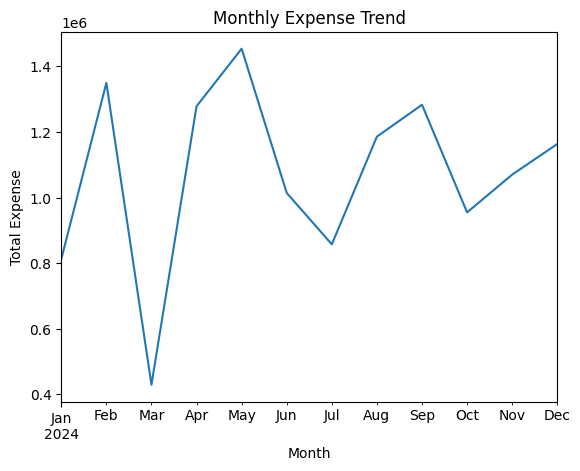

In [5]:
monthly_expense = df.groupby("Month")["Invoice Amount"].sum()

plt.figure()
monthly_expense.plot()
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Total Expense")
plt.show()

Observations:

Expenses fluctuate across months.

Certain months show higher spending.

Could indicate bulk purchasing or seasonal effect.

## 4. Top Expense Categories


In [9]:
category_expense = df.groupby("Expense Category")["Invoice Amount"].sum().sort_values(ascending=False)

top_3_categories = category_expense.head(3)
top_3_categories


,Invoice Amount
Expense Category,
Marketing,2495039
Raw Material,2185251
Office,2151918


Top 3 Expense Categories Analysis

Based on the aggregated data, the top three expense categories contribute the highest share of total spending.

These categories represent the primary cost drivers of the business. A high contribution from a specific category may indicate:

Operational intensity (e.g., Raw Material)

Administrative or workforce costs (e.g., Office or Travel)

Investment in growth and digital infrastructure (e.g., Software or Marketing)

## 5. Unusual Expense Detection


In [18]:
mean = monthly_expense.mean()
std = monthly_expense.std()

spike_months = monthly_expense[monthly_expense > mean + 1.5 * std]
spike_months

,Invoice Amount
Month,


To detect abnormal spending patterns, months where total expenses exceeded
Mean + 1.5 × Standard Deviation were identified as potential spikes.

This threshold highlights unusually high expenditure periods that may require
financial investigation or review.


## 6. GST vs Base Expense Analysis


In [11]:
gst_total = df["GST Amount"].sum()
base_total = df["Expense_Without_GST"].sum()

gst_total, base_total

(np.float64(1482934.06), np.float64(11370098.940000001))

In [20]:
gst_percentage = (gst_total / (gst_total + base_total)) * 100
gst_percentage = round(gst_percentage, 2)
gst_percentage

np.float64(11.54)

The GST component contributes approximately 11.54% of total expenditure.

This indicates that a significant portion of total spending is attributed to tax liability.
Separating GST from base expense is essential in accounting systems for accurate tax reporting,
input tax credit claims, and financial transparency.


## 7. Vendor Clustering (Machine Learning Task)

In [13]:
vendor_summary = df.groupby("Vendor Name")["Invoice Amount"].sum().reset_index()

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(vendor_summary[["Invoice Amount"]])

kmeans = KMeans(n_clusters=3, random_state=42)
vendor_summary["Cluster"] = kmeans.fit_predict(scaled_data)

vendor_summary

,Vendor Name,Invoice Amount,Cluster
0,Vendor_1,1287514,2
1,Vendor_10,826390,0
2,Vendor_11,687639,0
3,Vendor_12,974875,1
4,Vendor_13,1012644,1
5,Vendor_14,732633,0
6,Vendor_15,933261,1
7,Vendor_2,854365,0
8,Vendor_3,952538,1
9,Vendor_4,754520,0


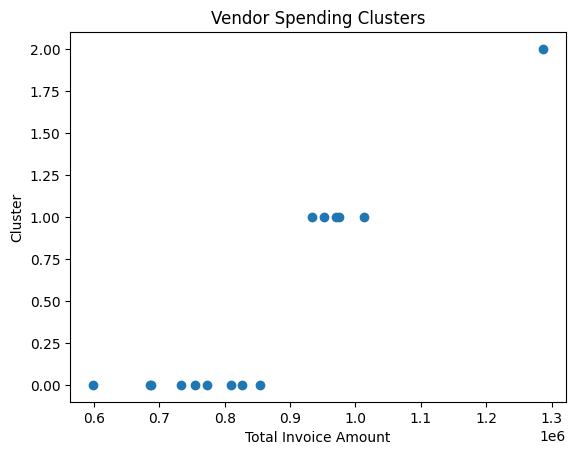

In [19]:
plt.figure()
plt.scatter(vendor_summary["Invoice Amount"], vendor_summary["Cluster"])
plt.xlabel("Total Invoice Amount")
plt.ylabel("Cluster")
plt.title("Vendor Spending Clusters")
plt.show()

Vendors are segmented into three groups based on their spending levels:

- Low spending vendors
- Medium spending vendors
- High spending vendors

This segmentation can assist businesses in vendor prioritization,
risk monitoring, and procurement strategy planning.